In [30]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib as mpl
from matplotlib.colors import LogNorm

In [31]:
# Custom rcParams

mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = 'true'
mpl.rcParams['ytick.minor.visible'] = 'true'
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 1.0
mpl.rcParams['xtick.major.size'] = 7.5
mpl.rcParams['ytick.major.size'] = 7.5
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True    
%set_env MANPATH=/home/paul.torrey/local/texlive/2018/texmf-dist/doc/man:$MANPATH
%set_env INFOPATH=/home/paul.torrey/local/texlive/2018/texmf-dist/doc/info:$INFOPATH
%set_env PATH=/home/paul.torrey/local/texlive/2018/bin/x86_64-linux:/home/paul.torrey/local/texlive/2018/texmf-dist:$PATH
mpl.rcParams['text.usetex']        = True
# mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['font.family']        = 'serif'
mpl.rc('font',**{'family':'sans-serif','serif':['Times New Roman'],'size':15})
mpl.rc('text', usetex=True)

env: MANPATH=/home/paul.torrey/local/texlive/2018/texmf-dist/doc/man:$MANPATH
env: INFOPATH=/home/paul.torrey/local/texlive/2018/texmf-dist/doc/info:$INFOPATH
env: PATH=/home/paul.torrey/local/texlive/2018/bin/x86_64-linux:/home/paul.torrey/local/texlive/2018/texmf-dist:$PATH


In [32]:
def value(hdf5_value):
    return float(np.array(hdf5_value))

all_grad = []
all_mass = []
all_SFRs = []
all_RSHM = []
all_RSFR = []

with h5py.File('TNG_Gradients.hdf5','r') as f:
    
    for z in np.arange(0,9):
        this_redshift = f['z=%s'%z]
        
        these_gradients_SF = []
        these_masses       = []
        these_SFR          = []
        these_RSHM         = []
        these_RSFR         = []
        
        for subhalo in this_redshift:
            
            # these_gradients_SF.append( value(this_redshift[subhalo]['StarFormingRegion']) )
            these_gradients_SF.append( value(this_redshift[subhalo]['ObservationalEquiv']) )
            these_masses.append( value(this_redshift[subhalo]['StellarMass']) )
            these_SFR.append( value(this_redshift[subhalo]['StarFormationRate']) )
            these_RSHM.append( value(this_redshift[subhalo]['StellarHalfMassRad']) )
            these_RSFR.append( value(this_redshift[subhalo]['SFRHalfMassRad']) )
            
        all_grad.append( these_gradients_SF )
        all_mass.append( these_masses       )
        all_SFRs.append( these_SFR          )
        all_RSHM.append( these_RSHM         )
        all_RSFR.append( these_RSFR         )

In [33]:
means     = []
stds_up   = []
stds_down = []
counts    = []

for redshift in np.arange(0,9):
    
    these_gradients = all_grad[redshift]
    
    mask = ~np.isnan( these_gradients )
    
    print( 'z=%s: %s' %(redshift, sum(mask)) )

    means    .append(np.nanmedian( these_gradients ))
    stds_up  .append(np.nanpercentile( these_gradients, 84 ))
    stds_down.append(np.nanpercentile( these_gradients, 16 ))
    counts   .append(sum(mask))
    
means     = np.array(means    )
stds_up   = np.array(stds_up  )
stds_down = np.array(stds_down)
counts    = np.array(counts   )

z=0: 1352
z=1: 1409
z=2: 1089
z=3: 614
z=4: 268
z=5: 88
z=6: 28
z=7: 6
z=8: 1


In [34]:
H21_x = np.array([
0.14429857058417106  ,
0.04468069164745003  ,
-0.054803986047169406,
-0.15838460193641257 ,
0.646600454549239    ,
0.5472489780967211   ,
0.4477809505573642   ,
0.3485127248811599   ,
1.1403941091750687   ,
1.0412757348962285   ,
0.9417577568910835   ,
0.8423563299727772   ,
2.1455972826946614   ,
2.0501419425736147   ,
1.9463948251317447   ,
1.8468934972818625   ,
3.1543802395957345   ,
3.0553617662484704   ,
2.9555773857591223   ,
2.8512808131935836   ,
])

H21_y = np.array([
-0.016403732964809847,
-0.01405772608829571,
-0.017865616596874703,
-0.03244116251384038,
-0.02275077215095027,
-0.03271256004462238,
-0.037289687726338006,
-0.051097661485693294,
-0.036017615864267896,
-0.056748724181852964,
-0.05901814034415867,
-0.06667221671842086,
-0.07640423246946776,
-0.06636751887711351,
-0.07325069306271281,
-0.07628934639815513,
-0.08217684129904515,
-0.10752337265545,
-0.09748499404756952,
-0.07898334151965969
])

H21_up_x = np.array([
0.1440654684104934   ,
0.044464239629034896 ,
-0.059432729210199486,
-0.15886745643903133 ,
0.6463007517545103   ,
0.5468327242151538   ,
0.44726479574422084  ,
0.3478800189811775   ,
1.1399612051382384   ,
1.0406763293067711   ,
0.9411084008358381   ,
0.8416403732964812   ,
2.144914626328891    ,
2.0450469950632293   ,
1.9455623173686099   ,
1.8460776396739904   ,
3.1534478309010234   ,
3.0543294566221837   ,
2.950149435143483    ,
2.850381704809398    ,
])

H21_up_y = np.array([
 -0.005634412540896888,
 -0.004057642837519401,
 -0.0040176824648889276,
 -0.010133284492877828,
 -0.008904503034490752,
 -0.01348163071620638,
 -0.01344333535910218,
 -0.021866648906500988,
 -0.016017449362715278,
 -0.029056185948933957,
 -0.029017890591829743,
 -0.03359501827354536,
 -0.04486550837086556,
 -0.03098094389730184,
 -0.03478883440588082,
 -0.03859672491445981,
 -0.039099559603393313,
 -0.05983066792097838,
 -0.046713675605025026,
 -0.03744453417028115
])

H21_down_x = np.array([
0.144964576794679   ,
0.04542994863427152 ,
-0.05345532347089099,
-0.15671958641014339,
0.647366361691323   ,
0.5483478883440593  ,
0.4492794645310072  ,
0.35004453916532796 ,
1.1414430689566184  ,
1.0425244965409308  ,
0.94315636993315    ,
0.8437882433253696  ,
2.1468127440288383  ,
2.047611118973685   ,
1.952588682889468   ,
1.848508562342344   ,
3.1564948093140974  ,
3.0572265836378927  ,
2.9579583579616884  ,
2.857591222038146   ,
])

H21_down_y = np.array([
-0.047173219890275425,
-0.04867339887944448,
-0.0801738276209425,
-0.10936487982750434,
-0.058135682115235676,
-0.08348221347164059,
-0.10652103330863555,
-0.12186748141426418,
-0.08447955777187618,
-0.11444151216710094,
-0.1236340628876364,
-0.13282661360817186,
-0.13255854610844245,
-0.1494434685603443,
-0.1594069214695427,
-0.15090535219240916,
-0.17986996228739838,
-0.19367793604675368,
-0.20748590980610895,
-0.17052423013844606
])

H21_line_x = np.array([ 3.0031302291893875 , -0.00703469059848949 ])
H21_line_y = np.array([-0.09442636052581194, -0.024807066325893426])

H21_slope, H21_intercept = np.polyfit( H21_line_x, H21_line_y, 1 )

JWST_x = np.array([
7.248902974158947,
6.288326252002507,
])

JWST_y = np.array([
-0.3585150100996026,
-0.2881381904297555
])

JWST_down_x = np.array([
7.25252490074528 , 
6.280873441526781, 
])

JWST_down_y = np.array([
-0.49904576164936953,
-0.3989691439715817
])

JWST_up_x = np.array([
7.255589607856795,
6.295779062478234,
])

JWST_up_y = np.array([
-0.2179563975760952,
-0.17730723688792938,
])

JWST_left_x = np.array([
7.640697917392213, 
6.73159434422233 , 
])

JWST_left_y = np.array([
-0.3601588075503239,
-0.28694016855889104
])

JWST_right_x = np.array([
6.857177683360033,
5.844988507348331,
])

JWST_right_y = np.array([
 -0.35957372710176205,
 -0.28663369784773995
])

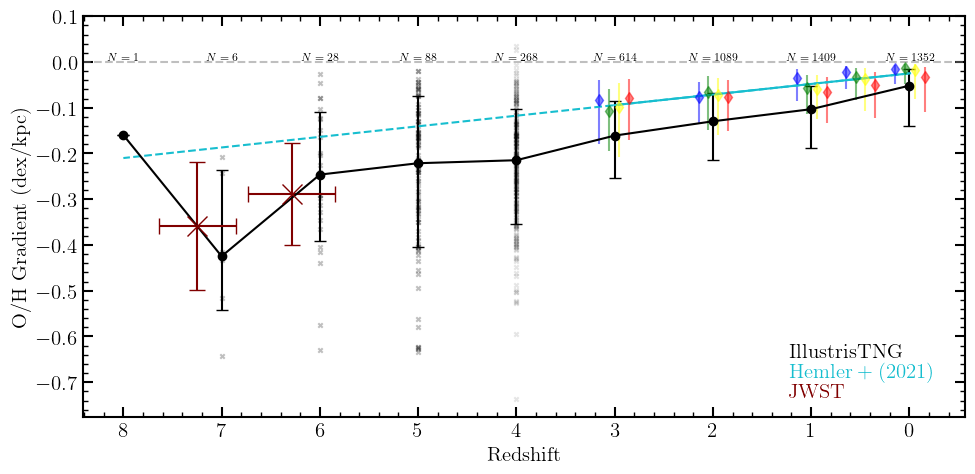

In [35]:
zs = np.arange(0,9)

plt.figure(figsize=(10,5))

plt.errorbar( zs, means, yerr=(means-stds_down,stds_up-means), capsize=4, color='k', marker='o' )

def plot_errorbar(x,y,y_down,y_up,x_left,x_right,color='g',marker='+'):
    
    plt.errorbar( x, y, yerr=(y-y_down, y_up-y), xerr=(x-x_right, x_left-x),
                  marker=marker, color=color, ls='none', markersize=15, capsize=6 )

def plot_errorbar_space(x,y,y_down,y_up,offset=0,color='g'):

    plt.errorbar( x[offset::4], y[offset::4], yerr=(y[offset::4]-y_down[offset::4], y_up[offset::4]-y[offset::4]),
                  marker='d', color=color, ls='none', alpha=0.5 )


plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=0, color='blue'   )
plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=1, color='green'  )
plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=2, color='yellow' )
plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=3, color='red'    )
    
plot_errorbar( JWST_x, JWST_y, JWST_down_y, JWST_up_y, JWST_left_x, JWST_right_x,
              color='maroon', marker='x' )
    
plt.plot( H21_line_x, H21_line_y, color='C9' )
plt.plot( zs, H21_slope*zs + H21_intercept, color='C9', linestyle='--' )

plt.xlabel(r'${\rm Redshift}$')
plt.ylabel(r'${\rm O/H~Gradient~(dex/kpc)}$')

xmin, xmax = plt.xlim()
plt.xlim(xmax, xmin)

plt.axhline(0, color='gray', linestyle='--', alpha=0.5)

plt.text( 0.8, 0.15, r'${\rm IllustrisTNG}$'  , color='k' , transform=plt.gca().transAxes, ha='left' )
plt.text( 0.8, 0.10, r'${\rm Hemler+(2021)}$' , color='C9', transform=plt.gca().transAxes, ha='left' )
plt.text( 0.8, 0.05, r'${\rm JWST}$'          , color='maroon', transform=plt.gca().transAxes, ha='left' )

for index, z in enumerate(zs):
    plt.text( z, 0.005, '$N=%s$' %counts[index] , ha='center', fontsize=8 )

    if (z == 4):
        y = all_grad[index]
        plt.scatter( np.ones(len(y))*z, y, color='k', marker='x', s=10, alpha=0.1 )
    elif (z > 4):
        y = all_grad[index]
        plt.scatter( np.ones(len(y))*z, y, color='k', marker='x', s=10, alpha=0.25 )

ymin, ymax = plt.ylim()
plt.ylim( ymin, 0.1 )
    
    
plt.tight_layout()
plt.savefig( 'TNG_Summary.pdf', bbox_inches='tight' )
plt.show()

10.599813461303711
10.592554092407227
10.59118938446045
10.576432228088379
10.598855972290039
10.47635555267334
10.47353458404541
9.843033790588379
9.139891624450684


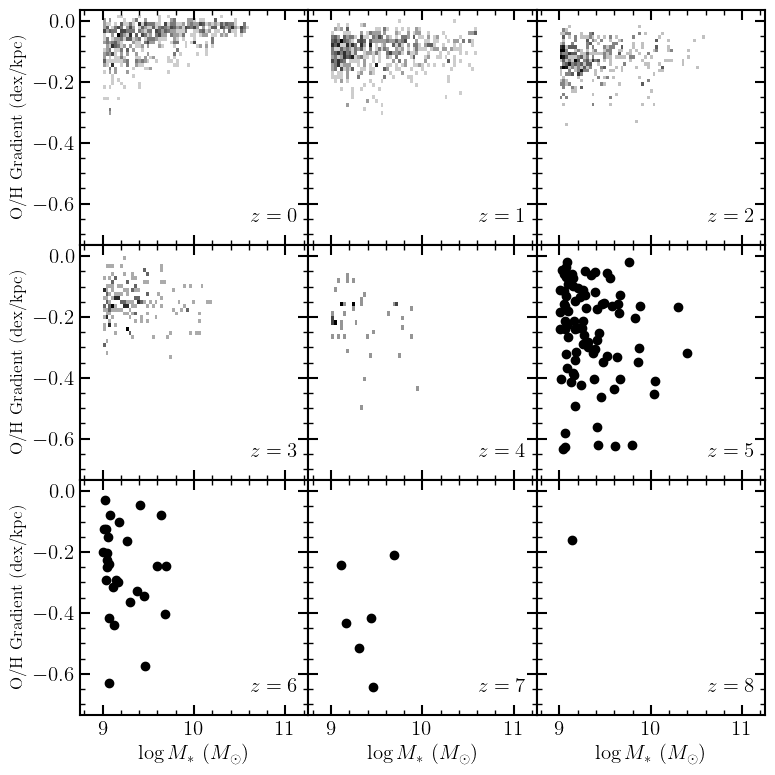

In [36]:
fig, axs = plt.subplots( 3, 3, figsize=(8,8), sharex=False, sharey=True )
axs_full = axs
axs = axs.flatten()

for z in np.arange(0,9):
    
    this_gradient = np.array(all_grad[z])
    this_mass     = np.array(all_mass[z])
    
    print(np.max(this_mass))
    
    ax = axs[z]
    
    mask = ~np.isnan(this_gradient)
    
    
    this_gradient = this_gradient[mask]
    this_mass     = this_mass    [mask]
    
    if sum(mask) > 100:
        ax.hist2d( this_mass, this_gradient, bins=(50,50), norm=LogNorm(), cmap=plt.cm.Greys )
    else:
        ax.scatter( this_mass, this_gradient, color='k' )
        
    ax.text( 0.85, 0.1, r'$z=%s$' %z, transform=ax.transAxes, ha='center' )
    
    ax.set_xlim( 8.75, 11.25 )
    
for ax in axs_full[2,:]:
    ax.set_xlabel(r'$\log M_* ~(M_\odot)$')
for ax in axs_full[:,0]:
    ax.set_ylabel(r'${\rm O/H~Gradient~(dex/kpc)}$',fontsize=12.5)

plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig( 'TNG_Grad_vs_Mass.pdf', bbox_inches='tight' )
plt.show()

[-10.083743   -10.01172115  -9.66748236 ...  -9.88529447  -9.73560602
  -9.63829372]


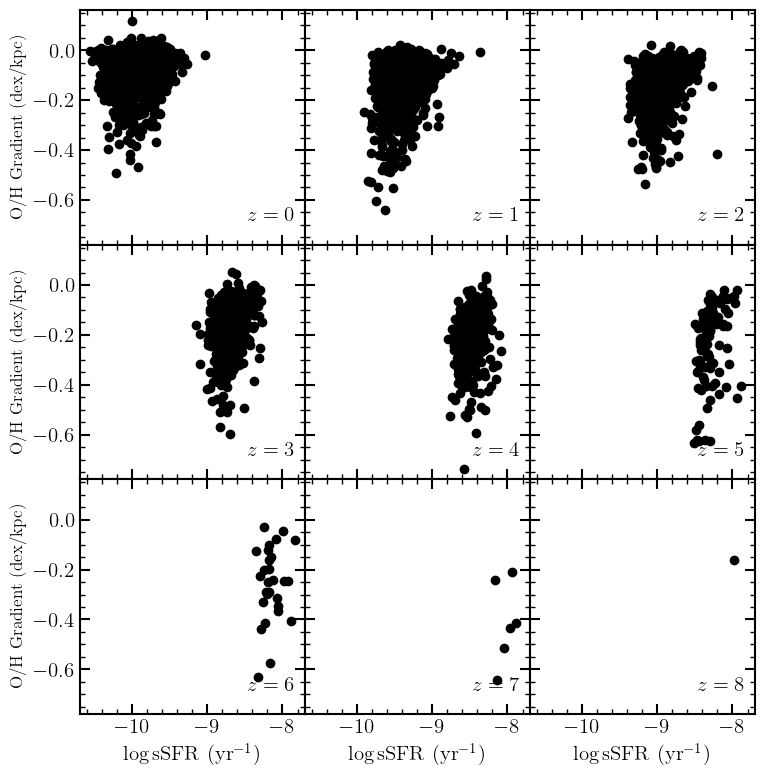

In [37]:
fig, axs = plt.subplots( 3, 3, figsize=(8,8), sharex=True, sharey=True )
axs_full = axs
axs = axs.flatten()

for z in np.arange(0,9):
    
    this_gradient = np.array(all_grad[z])
    this_SFR      = np.log10(np.array(all_SFRs[z]) / 10**np.array(all_mass[z]))
    
    if (z==0):
        print(this_SFR)
    
    ax = axs[z]
    
    mask = ~np.isnan(this_gradient)
    
    
    this_gradient = this_gradient[mask]
    this_SFR      = this_SFR     [mask]
    
    # if sum(mask) > 100:
    #     ax.hist2d( this_SFR, this_gradient, bins=(50,50), norm=LogNorm(), cmap=plt.cm.Greys )
    # else:
    ax.scatter( this_SFR, this_gradient, color='k' )
        
    ax.text( 0.85, 0.1, r'$z=%s$' %z, transform=ax.transAxes, ha='center' )
    
for ax in axs_full[2,:]:
    ax.set_xlabel(r'$\log {\rm sSFR}~({\rm yr}^{-1})$')
for ax in axs_full[:,0]:
    ax.set_ylabel(r'${\rm O/H~Gradient~(dex/kpc)}$',fontsize=12.5)

plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig( 'TNG_Grad_vs_SFR.pdf', bbox_inches='tight' )
plt.show()

In [38]:
def min_max(arr):
    
    Min = np.inf
    Max = -np.inf
    
    for sub_arr in arr:
        
        if len(sub_arr) > 0:
        
            loc_min = np.min(sub_arr)
            loc_max = np.max(sub_arr)

            if (loc_min < Min):
                Min = loc_min
            if (loc_max > Max):
                Max = loc_max
            
    return Min, Max

1352
1409
1089
614
268
88
28
6
1


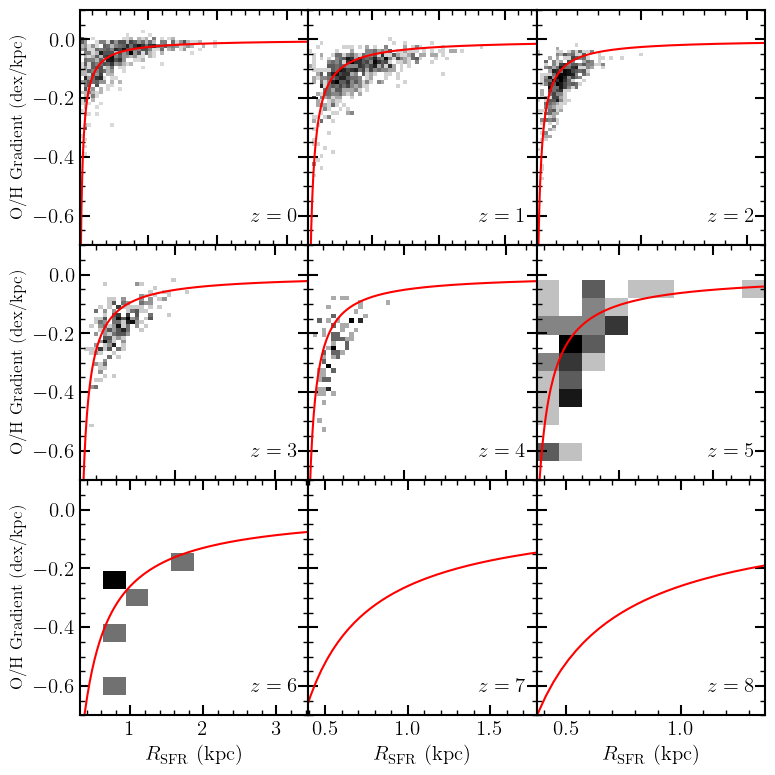

In [39]:
fig, axs = plt.subplots( 3, 3, figsize=(8,8), sharex=False, sharey=True )
axs_full = axs
axs = axs.flatten()

RSFR_min, RSFR_max = min_max(all_RSFR)
_r_ = np.linspace( RSFR_min, RSFR_max, 1000 )
C   = 0.26

for z in np.arange(0,9):
    
    this_gradient = np.array(all_grad[z])
    this_RSFR     = np.array(all_RSFR[z])
    
    ax = axs[z]
    
    mask = ~np.isnan(this_gradient)
    
    
    this_gradient = this_gradient[mask]
    this_RSFR     = this_RSFR    [mask]

    print(sum(mask))
    if sum(mask) > 1000:
        ax.hist2d( this_RSFR, this_gradient, bins=(60,50), norm=LogNorm(), cmap=plt.cm.Greys )
    elif sum(mask) > 100:
        ax.hist2d( this_RSFR, this_gradient, bins=(50,50), norm=LogNorm(), cmap=plt.cm.Greys )
    else:
        ax.hist2d( this_RSFR, this_gradient, bins=(10,10), norm=LogNorm(), cmap=plt.cm.Greys )
        # ax.scatter( this_RSFR, this_gradient, color='k' )
    
        
    ax.text( 0.85, 0.1, r'$z=%s$' %z, transform=ax.transAxes, ha='center' )
    
    ax.plot( _r_, -C/_r_, color='red' )
    
    ax.set_ylim( -0.7, 0.1 )
    
for ax in axs_full[2,:]:
    ax.set_xlabel(r'$R_{\rm SFR}~({\rm kpc})$')
for ax in axs_full[:,0]:
    ax.set_ylabel(r'${\rm O/H~Gradient~(dex/kpc)}$',fontsize=12.5)

plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig( 'TNG_Grad_vs_RSFR.pdf', bbox_inches='tight' )
plt.show()

In [40]:
all_grad = []
all_mass = []
all_SFRs = []
all_RSHM = []
all_RSFR = []

with h5py.File('EAGLE_Gradients.hdf5','r') as f:
    
    for z in np.arange(0,9):
        this_redshift = f['z=%s'%z]
        
        these_gradients_SF = []
        these_masses       = []
        these_SFR          = []
        these_RSHM         = []
        these_RSFR         = []
        
        for subhalo in this_redshift:
            
            these_gradients_SF.append( value(this_redshift[subhalo]['StarFormingRegion']) )
            these_masses.append( value(this_redshift[subhalo]['StellarMass']) )
            these_SFR.append( value(this_redshift[subhalo]['StarFormationRate']) )
            these_RSHM.append( value(this_redshift[subhalo]['StellarHalfMassRad']) )
            these_RSFR.append( value(this_redshift[subhalo]['SFRHalfMassRad']) )
            
        all_grad.append( these_gradients_SF )
        all_mass.append( these_masses       )
        all_SFRs.append( these_SFR          )
        all_RSHM.append( these_RSHM         )
        all_RSFR.append( these_RSFR         )

In [41]:
means     = []
stds_up   = []
stds_down = []
counts    = []

for redshift in np.arange(0,9):
    
    these_gradients = all_grad[redshift]
    
    mask = ~np.isnan( these_gradients )
    
    print( 'z=%s: %s' %(redshift, sum(mask)) )

    means    .append(np.nanmedian( these_gradients ))
    stds_up  .append(np.nanpercentile( these_gradients, 84 ))
    stds_down.append(np.nanpercentile( these_gradients, 16 ))
    counts   .append(sum(mask))
    
means     = np.array(means    )
stds_up   = np.array(stds_up  )
stds_down = np.array(stds_down)
counts    = np.array(counts   )

z=0: 1047
z=1: 1190
z=2: 819
z=3: 291
z=4: 82
z=5: 14
z=6: 2
z=7: 0
z=8: 0


/scratch/local/20612258/ipykernel_3566073/399434030.py:14: RuntimeWarning: All-NaN slice encountered
  means    .append(np.nanmedian( these_gradients ))
/home/alexgarcia/.local/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/home/alexgarcia/.local/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/alexgarcia/.local/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1562: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [42]:
T_21_x = np.array([
0.05253940455341499,
0.23467600700525404,
0.4133099824868651 ,
0.5499124343257442 ,
0.6584938704028023 ,
0.777583187390543  ,
0.9106830122591942 ,
1.3064798598949212 ,
1.5656742556917689 ,
1.7828371278458846 ,
2.052539404553415  ,
2.283712784588441  ,
2.5464098073555164 ,

])

T_21_y = np.array([
-0.0017691700147659528,
-0.00034339480100264996,
-0.005189382232752948,
0.000977988393255802,
-0.006950310772294854,
0.0007994230967343641,
-0.002442223824731249,
0.0019532296281035144,
-0.0013873149960509368,
0.001579616084612545,
-0.0017691700147659528,
0.005892654785206619,
-0.008431029154218561
])

T_21_x_up = np.array([
0.05253940455341499, 
0.2311733800350262 , 
0.4133099824868651 , 
0.5464098073555166 , 
0.679509632224168  , 
0.777583187390543  , 
0.9106830122591942 , 
1.299474605954466  , 
1.5551663747810858 , 
1.7828371278458846 , 
2.0490367775831873 , 
2.280210157618213  , 
2.549912434325744  , 
])

T_21_y_up = np.array([
0.009211222142096798,
0.015345626867209305,
0.016771402080972553,
0.0213728924144089,
0.0322488925517668,
0.04001510937124417,
0.019518560488994252,
0.05686068472923325,
0.02842484804780057,
0.05805020431990662,
0.046861028124034226,
0.05609148037498715,
0.16411524329521654
])

T_21_x_down=np.array([
0.05604203152364273, 
0.23467600700525404, 
0.41681260945709275, 
0.5499124343257442 , 
0.6619964973730297 , 
0.777583187390543  , 
0.9141856392294221 , 
1.3029772329246934 , 
1.5551663747810858 , 
1.7828371278458846 , 
2.0490367775831873 , 
2.283712784588441  , 
2.549912434325744  , 
])

T_21_y_down=np.array([
-0.01902681913395826,
-0.01916692421276739,
-0.025584286253906074,
-0.02725730572439128,
-0.03361972459736956,
-0.039984890628755876,
-0.030680265100786308,
-0.052945983997802204,
-0.05157515195219936,
-0.040773325091858104,
-0.08804093266027951,
-0.030185776587342394,
-0.08059063905772462
])

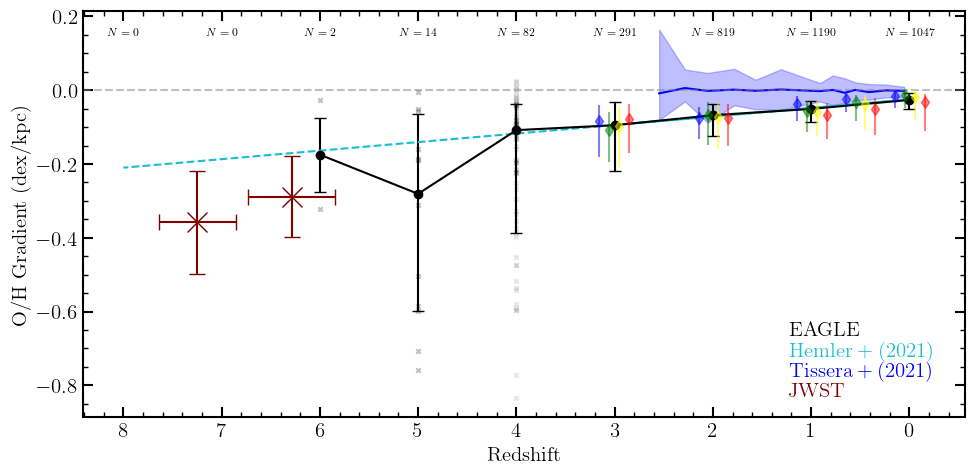

In [43]:
zs = np.arange(0,9)

plt.figure(figsize=(10,5))

plt.errorbar( zs, means, yerr=(means-stds_down,stds_up-means), capsize=4, color='k', marker='o' )

def plot_errorbar(x,y,y_down,y_up,x_left,x_right,color='g',marker='+'):
    
    plt.errorbar( x, y, yerr=(y-y_down, y_up-y), xerr=(x-x_right, x_left-x),
                  marker=marker, color=color, ls='none', markersize=15, capsize=6 )

def plot_errorbar_space(x,y,y_down,y_up,offset=0,color='g'):

    plt.errorbar( x[offset::4], y[offset::4], yerr=(y[offset::4]-y_down[offset::4], y_up[offset::4]-y[offset::4]),
                  marker='d', color=color, ls='none', alpha=0.5 )


def plot_fill_between(x,y,y_down,y_up,color='r'):
    
    plt.plot( x, y, color=color )
    plt.fill_between( x, y_up, y_down, color=color, alpha=0.25 )
    
plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=0, color='blue'   )
plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=1, color='green'  )
plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=2, color='yellow' )
plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=3, color='red'    )
    
plot_errorbar( JWST_x, JWST_y, JWST_down_y, JWST_up_y, JWST_left_x, JWST_right_x,
              color='maroon', marker='x' )
plot_fill_between( T_21_x, T_21_y, T_21_y_up, T_21_y_down, color='b' )
    
plt.plot( H21_line_x, H21_line_y, color='C9' )
plt.plot( zs, H21_slope*zs + H21_intercept, color='C9', linestyle='--' )

plt.xlabel(r'${\rm Redshift}$')
plt.ylabel(r'${\rm O/H~Gradient~(dex/kpc)}$')

xmin, xmax = plt.xlim()
plt.xlim(xmax, xmin)

plt.axhline(0, color='gray', linestyle='--', alpha=0.5)

plt.text( 0.8, 0.20, r'${\rm EAGLE}$'         , color='k' , transform=plt.gca().transAxes, ha='left' )
plt.text( 0.8, 0.15, r'${\rm Hemler+(2021)}$' , color='C9', transform=plt.gca().transAxes, ha='left' )
plt.text( 0.8, 0.10, r'${\rm Tissera+(2021)}$', color='b' , transform=plt.gca().transAxes, ha='left' )
plt.text( 0.8, 0.05, r'${\rm JWST}$'          , color='maroon', transform=plt.gca().transAxes, ha='left' )

for index, z in enumerate(zs):
    plt.text( z, 0.15, '$N=%s$' %counts[index] , ha='center', fontsize=8 )

    if (z == 4):
        y = all_grad[index]
        plt.scatter( np.ones(len(y))*z, y, color='k', marker='x', s=10, alpha=0.1 )
    elif (z > 4):
        y = all_grad[index]
        plt.scatter( np.ones(len(y))*z, y, color='k', marker='x', s=10, alpha=0.25 )

ymin, ymax = plt.ylim()
# plt.ylim( ymin, 0.1 )
    
    
plt.tight_layout()
plt.savefig( 'EAGLE_Summary.pdf', bbox_inches='tight' )
plt.show()

10.599035263061523
10.59864330291748
10.595070838928223
10.59885311126709
10.589688301086426
10.544783592224121
10.43426513671875


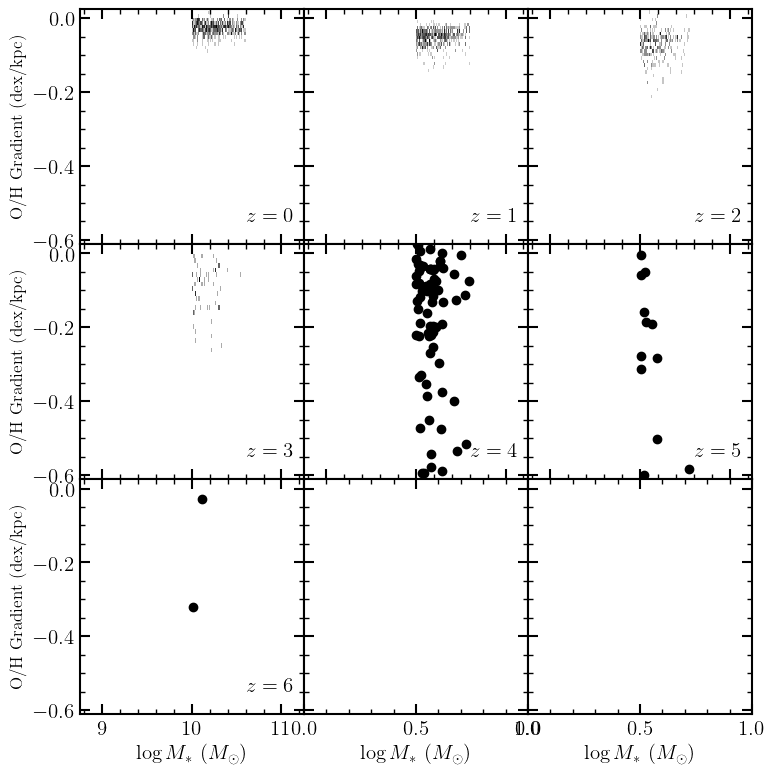

In [44]:
fig, axs = plt.subplots( 3, 3, figsize=(8,8), sharex=False, sharey=True )
axs_full = axs
axs = axs.flatten()

for z in np.arange(0,7):
    
    this_gradient = np.array(all_grad[z])
    this_mass     = np.array(all_mass[z])
    
    print(np.max(this_mass))
    
    ax = axs[z]
    
    mask = ~np.isnan(this_gradient)
    
    
    this_gradient = this_gradient[mask]
    this_mass     = this_mass    [mask]
    
    if sum(mask) > 100:
        ax.hist2d( this_mass, this_gradient, bins=(50,50), norm=LogNorm(), cmap=plt.cm.Greys )
    else:
        ax.scatter( this_mass, this_gradient, color='k' )
        
    ax.text( 0.85, 0.1, r'$z=%s$' %z, transform=ax.transAxes, ha='center' )
    
    ax.set_xlim( 8.75, 11.25 )
    
for ax in axs_full[2,:]:
    ax.set_xlabel(r'$\log M_* ~(M_\odot)$')
for ax in axs_full[:,0]:
    ax.set_ylabel(r'${\rm O/H~Gradient~(dex/kpc)}$',fontsize=12.5)

plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig( 'EAGLE_Grad_vs_Mass.pdf', bbox_inches='tight' )
plt.show()

[ -9.98468862 -10.64645837 -10.2446179  ... -10.65715312 -10.27330823
 -10.31130657]


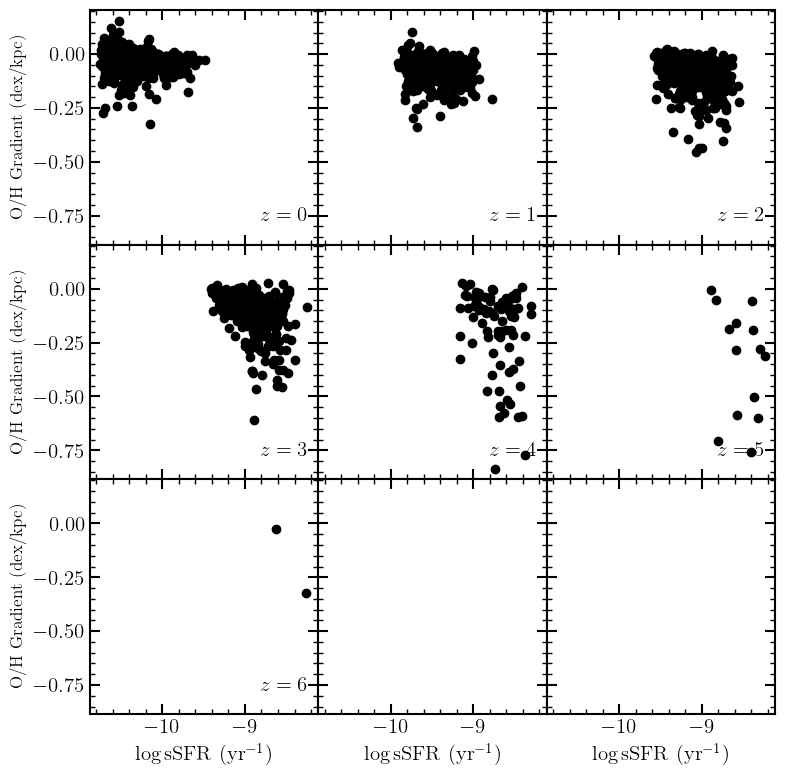

In [45]:
fig, axs = plt.subplots( 3, 3, figsize=(8,8), sharex=True, sharey=True )
axs_full = axs
axs = axs.flatten()

for z in np.arange(0,7):
    
    this_gradient = np.array(all_grad[z])
    this_SFR      = np.log10(np.array(all_SFRs[z]) / 10**np.array(all_mass[z]))
    
    if (z==0):
        print(this_SFR)
    
    ax = axs[z]
    
    mask = ~np.isnan(this_gradient)
    
    
    this_gradient = this_gradient[mask]
    this_SFR      = this_SFR     [mask]
    
    # if sum(mask) > 100:
    #     ax.hist2d( this_SFR, this_gradient, bins=(50,50), norm=LogNorm(), cmap=plt.cm.Greys )
    # else:
    ax.scatter( this_SFR, this_gradient, color='k' )
        
    ax.text( 0.85, 0.1, r'$z=%s$' %z, transform=ax.transAxes, ha='center' )
    
for ax in axs_full[2,:]:
    ax.set_xlabel(r'$\log {\rm sSFR}~({\rm yr}^{-1})$')
for ax in axs_full[:,0]:
    ax.set_ylabel(r'${\rm O/H~Gradient~(dex/kpc)}$',fontsize=12.5)

plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig( 'EAGLE_Grad_vs_SFR.pdf', bbox_inches='tight' )
plt.show()

1047
1190
819
291
82
14
2


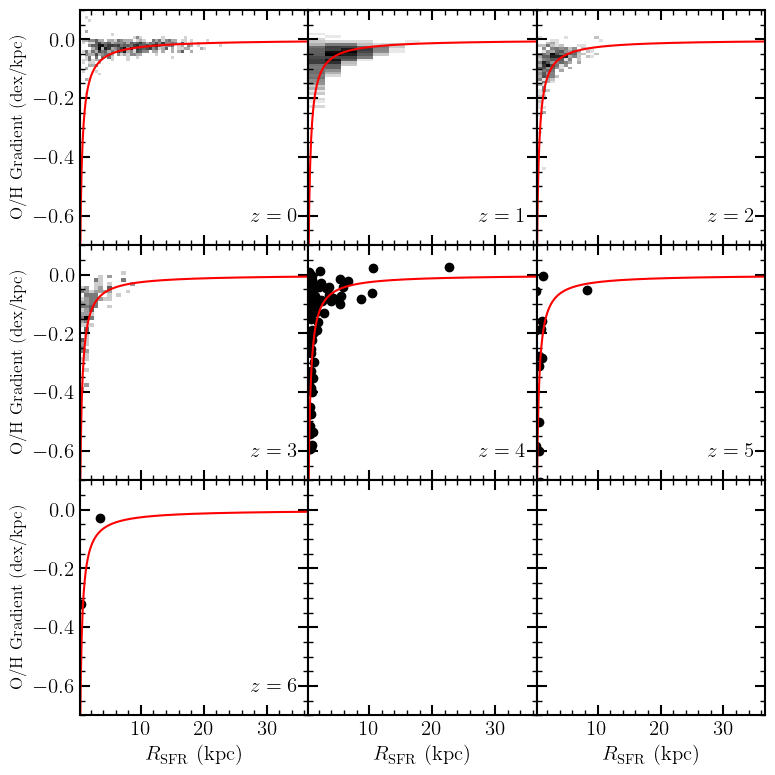

In [47]:
fig, axs = plt.subplots( 3, 3, figsize=(8,8), sharex=True, sharey=True )
axs_full = axs
axs = axs.flatten()

RSFR_min, RSFR_max = min_max(all_RSFR)
_r_ = np.linspace( RSFR_min, RSFR_max, 1000 )
C   = 0.26

for z in np.arange(0,7):
    
    this_gradient = np.array(all_grad[z])
    this_RSFR     = np.array(all_RSFR[z])
    
    ax = axs[z]
    
    mask = ~np.isnan(this_gradient)
    
    
    this_gradient = this_gradient[mask]
    this_RSFR     = this_RSFR    [mask]

    print(sum(mask))
    if sum(mask) > 1000:
        ax.hist2d( this_RSFR, this_gradient, bins=(60,50), norm=LogNorm(), cmap=plt.cm.Greys )
    elif sum(mask) > 100:
        ax.hist2d( this_RSFR, this_gradient, bins=(50,50), norm=LogNorm(), cmap=plt.cm.Greys )
    else:
        # ax.hist2d( this_RSFR, this_gradient, bins=(10,10), norm=LogNorm(), cmap=plt.cm.Greys )
        ax.scatter( this_RSFR, this_gradient, color='k' )
    
        
    ax.text( 0.85, 0.1, r'$z=%s$' %z, transform=ax.transAxes, ha='center' )
    
    ax.plot( _r_, -C/_r_, color='red' )
    
    ax.set_ylim( -0.7, 0.1 )
    
for ax in axs_full[2,:]:
    ax.set_xlabel(r'$R_{\rm SFR}~({\rm kpc})$')
for ax in axs_full[:,0]:
    ax.set_ylabel(r'${\rm O/H~Gradient~(dex/kpc)}$',fontsize=12.5)

plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig( 'EAGLE_Grad_vs_RSFR.pdf', bbox_inches='tight' )
plt.show()